## Data Dictionary

| Variable  |  Definition |	Key	 |
|-----------|-------------|------|
|survival:  |	Survival  | 	0 = No, 1 = Yes	|
|pclass:   	|Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd	|
|sex:      	|Sex 	| |
|Age:      	|Age in years| 	|
|sibsp:    	|# of siblings / spouses aboard the Titanic 	| |
|parch:    	|# of parents / children aboard the Titanic 	| |
|ticket:   	|Ticket number 	| |
|fare:     	|Passenger fare 	| |
|cabin:    	|Cabin number 	| |
|embarked: 	|Port of Embarkation 	|C = Cherbourg, Q = Queenstown, S = Southampton|


pclass: A proxy for socio-economic status (SES)	
1st = Upper	
2nd = Middle	
3rd = Lower	

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...	
Sibling = brother, sister, stepbrother, stepsister	
Spouse = husband, wife (mistresses and fiancés were ignored)	

parch: The dataset defines family relations in this way...	
Parent = mother, father	

Child = daughter, son, stepdaughter, stepson	

Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
# This Python 3 environment comes with many 

#helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


## Training Data loading

In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Test data load

In [4]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Check basic info in the dataset

In [6]:
print("# of unique items in column Name: ",len(train_data.Name.unique().tolist()))
print("# of unique items in column Ticket: ",len(train_data.Ticket.unique().tolist()))

# of unique items in column Name:  891
# of unique items in column Ticket:  681


## Drop columns Name, Ticket and Cabin

In [7]:
#Add code drop columns on Train and Test datasets
#Keep original datasets
train_original = train_data
test_original = test_data
train_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId', 'Fare', 'Embarked'], axis=1, inplace=True)
test_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId', 'Fare', 'Embarked'], axis=1, inplace=True)

In [8]:
train_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


**'describe()' method to get the statistical summary of the various features of the data set**

In [9]:
train_data.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
10%,0.000000,1.000000,14.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
90%,1.000000,3.000000,50.000000,1.000000,2.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


**'columns' method to get the names of the columns (features)**


In [10]:
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

## Basic plotting and visualization on the data set

**Pairplots using seaborn**


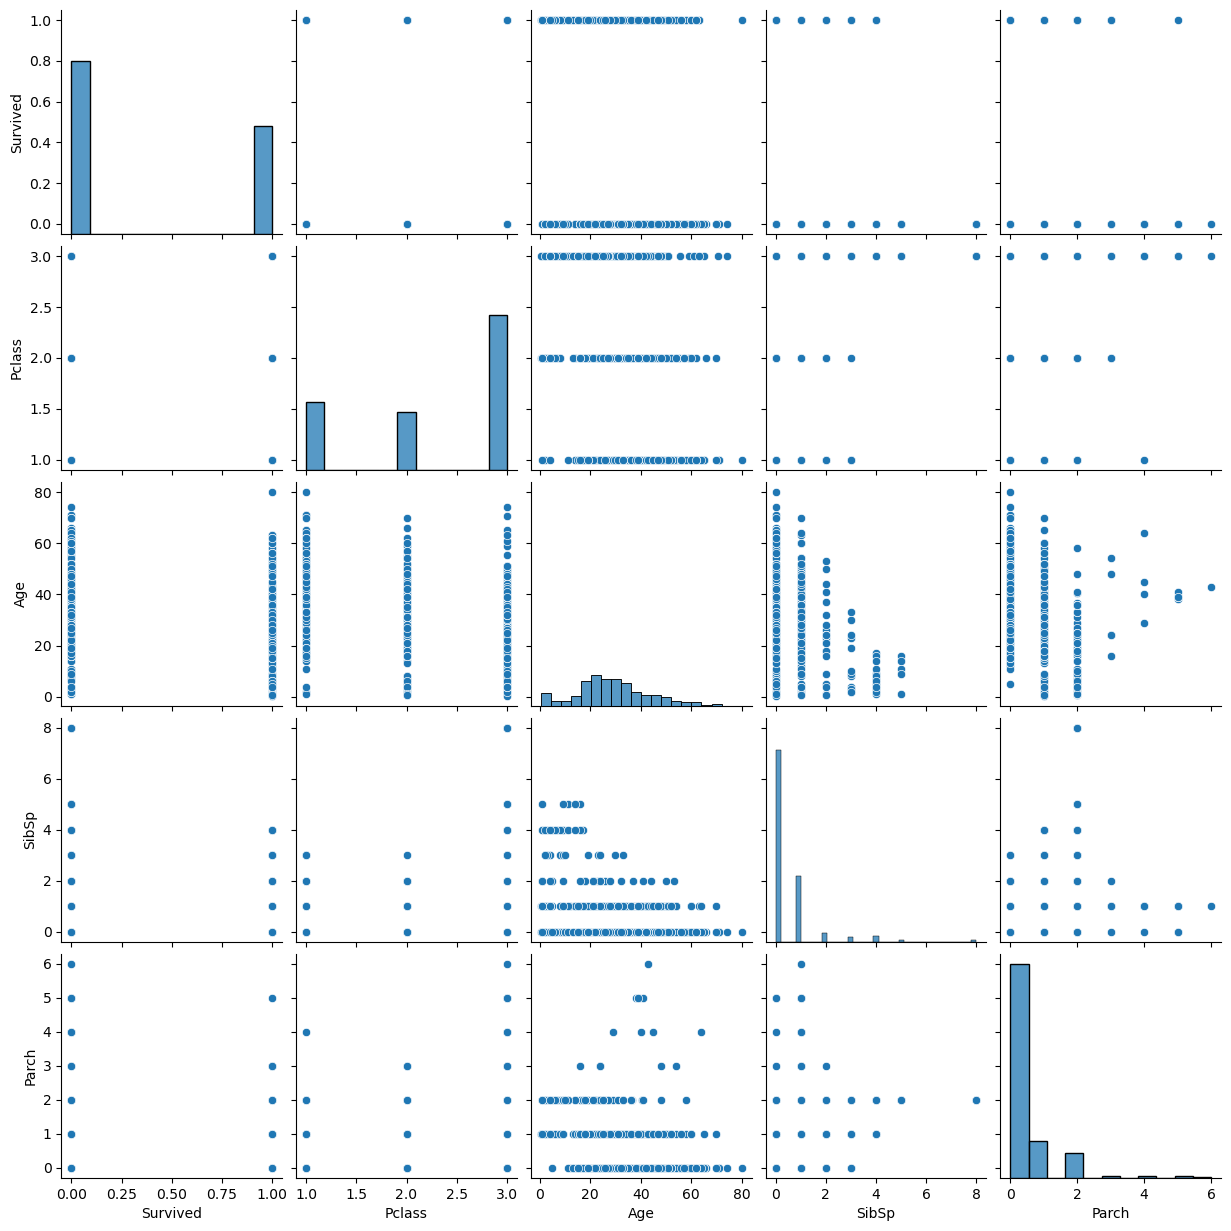

In [11]:
sns.pairplot(train_data)

**Correlation matrix and heatmap**

In [12]:
train_data.corr()

,Survived,Pclass,Age,SibSp,Parch
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000


<AxesSubplot:>

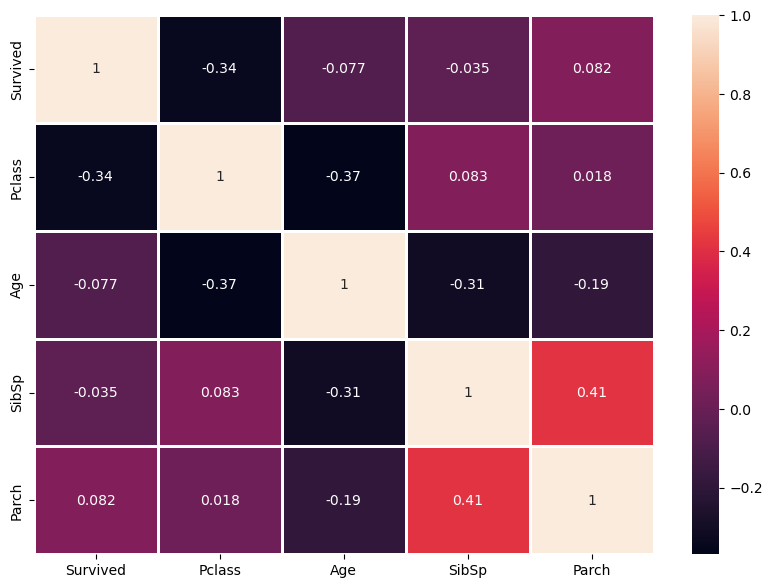

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(train_data.corr(),annot=True,linewidths=2)

## Split Dataset into Train and Validate

In [14]:
from sklearn.model_selection import train_test_split

# Separate target from predictors
y = train_data.Survived
X = train_data.drop(['Survived'], axis=1)

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.75, test_size=0.25,
                                                                random_state=1)

print("Training feature set size:",X_train_full.shape)
print("Validation feature set size:",X_valid_full.shape)
print("Training variable set size:",y_train.shape)
print("Validation variable set size:",y_valid.shape)

Training feature set size: (668, 5)
Validation feature set size: (223, 5)
Training variable set size: (668,)
Validation variable set size: (223,)


## Creating a Pipeline

In [15]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

Define Pre-Processing steps

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='most_frequent')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


Define the model

In [17]:
# Commenting RandomForestRegressor
"""
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=250, random_state=0)
"""
# XGBoost
from xgboost import XGBClassifier

# Define the model
model = XGBClassifier(n_estimators = 100, learning_rate = 0.01, random_state=0) # 

Create and Evaluate the Pipeline

In [18]:
from sklearn.metrics import mean_absolute_error

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)


MAE: 0.2062780269058296


In [19]:
test_original = pd.read_csv("/kaggle/input/titanic/test.csv")
test_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [20]:
preds = my_pipeline.predict(test_data)

output = pd.DataFrame({'PassengerId': test_original.PassengerId, 'Survived': preds})

output['Survived'] = output['Survived'].apply(lambda x: 0 if x<= 0.5 else 1)

output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## Perform a cross-validation

In [21]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=4,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

MAE scores:
 [0.21076233 0.15695067 0.20179372 0.15765766]
Average MAE score (across experiments):
0.1817910960287642


In [22]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [23]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


Verify additional data to add in the model

Qtd null values:  177
891


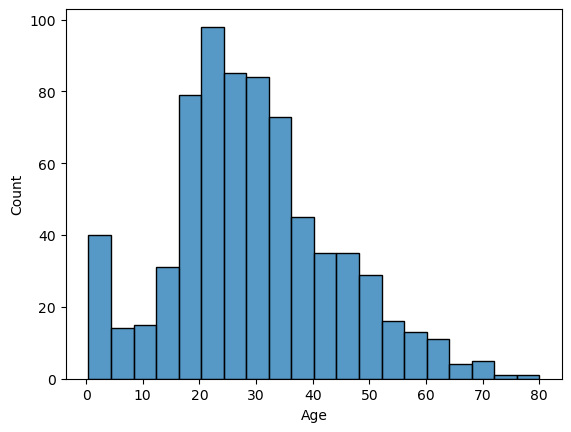

In [24]:
sns.histplot(data = train_data, x = "Age")
print('Qtd null values: ', train_data['Age'].isnull().sum())
print(len(train_data))

from sklearn.ensemble import RandomForestClassifier

#https://www.kaggle.com/code/dansbecker/handling-missing-values/notebook
#Missing Values without droping data
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

X['Fare'] = train_data['Fare']
X_test['Fare'] = test_data['Fare']

X_test_with_imputed_values = my_imputer.fit_transform(X_test)

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
#original
#predictions = model.predict(X_test)
predictions = model.predict(X_test_with_imputed_values)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")